In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
pms_ms_csv = pd.read_csv("C:/Users/OWNER/CR4CR/data/Fall2023_MS_PSM.csv")
pms_ms_csv.head()

,Assignment,Activities,Date,Time,Action
0,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:37.893,Begin activity Fall 2023 MS PSM Administration
1,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:39.329,Page 1 Loaded
2,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:43.210,Page next clicked on page 1
3,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:44.930,Page 2 Loaded
4,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:55.772,Page next clicked on page 2


In [3]:
list(pms_ms_csv["Activities"].unique())

['Fall 2023 PSM MS Form A', 'Fall 2023 PSM MS Form B']

In [4]:
#Unique assignment values: 6192
unique = len(pms_ms_csv["Assignment"].unique())
unique

2956

In [5]:
#Number of Students with No End Time After Beginning Activity: 575
# Filter rows for "Begin activity" and "End activity"
begin_activities = pms_ms_csv[pms_ms_csv['Action'].str.contains("Begin activity")]
end_activities = pms_ms_csv[pms_ms_csv['Action'].str.contains("End activity")]

# Get unique Assignment IDs for both begins and ends
begin_ids = set(begin_activities['Assignment'].unique())
end_ids = set(end_activities['Assignment'].unique())

# Identify Assignment IDs that don't have an end
ids_without_end = begin_ids - end_ids
len(ids_without_end)

638

In [6]:
#Dataframe of the IDs that don't have end activity
filtered_df = pms_ms_csv[pms_ms_csv["Assignment"].isin(ids_without_end)]
example = filtered_df[filtered_df["Assignment"] == 92261]
example

,Assignment,Activities,Date,Time,Action
41,92261,Fall 2023 PSM MS Form B,11/16/2023,07:40:25.073,Begin activity Fall 2023 MS PSM Administration
42,92261,Fall 2023 PSM MS Form B,11/16/2023,07:40:25.597,Page 1 Loaded
43,92261,Fall 2023 PSM MS Form B,11/16/2023,07:42:51.239,Page next clicked on page 1
44,92261,Fall 2023 PSM MS Form B,11/16/2023,07:42:51.980,Page 2 Loaded
45,92261,Fall 2023 PSM MS Form B,11/16/2023,07:43:28.118,Page next clicked on page 2
46,92261,Fall 2023 PSM MS Form B,11/16/2023,07:43:30.667,Page 3 Loaded
47,92261,Fall 2023 PSM MS Form B,11/16/2023,07:46:56.347,Pause activity Fall 2023 MS PSM Administration
48,92261,Fall 2023 PSM MS Form B,11/17/2023,07:30:31.331,Continue activity Fall 2023 MS PSM Administration
49,92261,Fall 2023 PSM MS Form B,11/17/2023,07:30:32.037,Page 4 Loaded
50,92261,Fall 2023 PSM MS Form B,11/17/2023,07:30:37.628,Page next clicked on page 4


In [7]:
#Filtered Dataframe only showing the Assignment Numbers where the Dates are different
#for begin and end activity
def has_different_dates(group):
    begin_dates = group[group["Action"] == "Begin activity Fall 2023 MS PSM Administration"]["Date"]
    end_dates = group[group["Action"] == "End activity Fall 2023 MS PSM Administration"]["Date"]
    all_dates = pd.concat([begin_dates, end_dates]).unique()
    return len(all_dates) > 1
    
filtered_groups = pms_ms_csv.groupby("Assignment").filter(has_different_dates)
example_grp = filtered_groups[filtered_groups["Assignment"] == 80539]
example_grp

,Assignment,Activities,Date,Time,Action
179,80539,Fall 2023 PSM MS Form B,10/11/2023,08:39:06.602,Begin activity Fall 2023 MS PSM Administration
180,80539,Fall 2023 PSM MS Form B,10/11/2023,08:39:07.973,Page 1 Loaded
181,80539,Fall 2023 PSM MS Form B,10/11/2023,08:40:45.206,Page next clicked on page 1
182,80539,Fall 2023 PSM MS Form B,10/11/2023,08:40:46.979,Page 2 Loaded
183,80539,Fall 2023 PSM MS Form B,10/11/2023,08:41:32.994,Page next clicked on page 2
184,80539,Fall 2023 PSM MS Form B,10/11/2023,08:41:34.850,Page 3 Loaded
185,80539,Fall 2023 PSM MS Form B,10/11/2023,08:44:32.396,Page next clicked on page 3
186,80539,Fall 2023 PSM MS Form B,10/11/2023,08:44:34.864,Page 4 Loaded
187,80539,Fall 2023 PSM MS Form B,10/11/2023,08:44:40.915,Page next clicked on page 4
188,80539,Fall 2023 PSM MS Form B,10/11/2023,08:44:42.562,Page 5 Loaded


In [8]:
df_ids = len(filtered_groups['Assignment'].unique())
df_ids

602

In [9]:
#Number of Students with different beginning and end: 852
filtered_pms_csv = filtered_groups[filtered_groups["Action"].isin(["Begin activity Fall 2023 MS PSM Administration", 
                                                 "End activity Fall 2023 MS PSM Administration"])]
filtered_pms_csv

,Assignment,Activities,Date,Time,Action
179,80539,Fall 2023 PSM MS Form B,10/11/2023,08:39:06.602,Begin activity Fall 2023 MS PSM Administration
236,80539,Fall 2023 PSM MS Form B,11/06/2023,08:26:31.917,End activity Fall 2023 MS PSM Administration
237,80543,Fall 2023 PSM MS Form B,10/16/2023,08:23:05.042,Begin activity Fall 2023 MS PSM Administration
277,80543,Fall 2023 PSM MS Form B,10/18/2023,08:35:13.532,End activity Fall 2023 MS PSM Administration
2025,76511,Fall 2023 PSM MS Form A,09/28/2023,09:07:40.989,Begin activity Fall 2023 MS PSM Administration
...,...,...,...,...,...
107354,76509,Fall 2023 PSM MS Form A,11/06/2023,09:13:05.301,End activity Fall 2023 MS PSM Administration
107355,76517,Fall 2023 PSM MS Form A,09/28/2023,09:06:11.949,Begin activity Fall 2023 MS PSM Administration
107398,76517,Fall 2023 PSM MS Form A,11/06/2023,09:27:59.525,End activity Fall 2023 MS PSM Administration
114756,80944,Fall 2023 PSM MS Form B,10/12/2023,08:27:30.111,Begin activity Fall 2023 MS PSM Administration


In [10]:
#Full Dataframe of Students where their begin and end activity are different
filtered_df_2 = filtered_groups
filtered_df_2

,Assignment,Activities,Date,Time,Action
179,80539,Fall 2023 PSM MS Form B,10/11/2023,08:39:06.602,Begin activity Fall 2023 MS PSM Administration
180,80539,Fall 2023 PSM MS Form B,10/11/2023,08:39:07.973,Page 1 Loaded
181,80539,Fall 2023 PSM MS Form B,10/11/2023,08:40:45.206,Page next clicked on page 1
182,80539,Fall 2023 PSM MS Form B,10/11/2023,08:40:46.979,Page 2 Loaded
183,80539,Fall 2023 PSM MS Form B,10/11/2023,08:41:32.994,Page next clicked on page 2
...,...,...,...,...,...
114793,80944,Fall 2023 PSM MS Form B,11/17/2023,08:27:54.625,Page 17 Loaded
114794,80944,Fall 2023 PSM MS Form B,11/17/2023,08:28:05.192,Page next clicked on page 17
114795,80944,Fall 2023 PSM MS Form B,11/17/2023,08:28:08.038,Page 18 Loaded
114796,80944,Fall 2023 PSM MS Form B,11/17/2023,08:28:25.179,Page next clicked on page 18


In [12]:
#Combining the two dataframes that eventually will be dropped
combined_df = pd.concat([filtered_df, filtered_df_2]).drop_duplicates()
combined_df

44080

In [13]:
#DATAFRAME OF STUDENTS AFTER DROPPING STUDENTS WHOSE BEGINNING AND END DATES ARE DIFFERENT
#AND DROPPING STUDENTS WHO DON'T HAVE AN END ACTIVITY 
#drops the rows from the dataframe containing different dates for assignments.
combined = pd.concat([pms_ms_csv, combined_df])

result = combined.drop_duplicates(keep=False)
result
result_df = (result.reset_index()).drop("index", axis = 1)
result_df

,Assignment,Activities,Date,Time,Action
0,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:37.893,Begin activity Fall 2023 MS PSM Administration
1,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:39.329,Page 1 Loaded
2,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:43.210,Page next clicked on page 1
3,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:44.930,Page 2 Loaded
4,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:55.772,Page next clicked on page 2
...,...,...,...,...,...
71030,93083,Fall 2023 PSM MS Form B,11/30/2023,07:34:33.248,Page 17 Loaded
71031,93083,Fall 2023 PSM MS Form B,11/30/2023,07:34:43.579,Page next clicked on page 17
71032,93083,Fall 2023 PSM MS Form B,11/30/2023,07:34:45.602,Page 18 Loaded
71033,93083,Fall 2023 PSM MS Form B,11/30/2023,07:35:21.116,Page next clicked on page 18


In [14]:
#Number of Students Who Paused: Using the Modified Dataframe
pause = result_df[result_df["Action"].str.contains("Pause")]
unique_pause = len(pause["Assignment"].unique())
unique_pause

108

In [15]:
#START AND END WITH PAUSE
pause = result_df[result_df["Action"].str.contains("Pause")]
pause_df = pause.drop_duplicates(subset=['Assignment'])
pause_df

,Assignment,Activities,Date,Time,Action
399,80567,Fall 2023 PSM MS Form A,10/11/2023,09:28:55.812,Pause activity Fall 2023 MS PSM Administration
430,80565,Fall 2023 PSM MS Form A,10/11/2023,09:02:53.111,Pause activity Fall 2023 MS PSM Administration
1400,76512,Fall 2023 PSM MS Form B,09/28/2023,09:05:49.569,Pause activity Fall 2023 MS PSM Administration
1499,76505,Fall 2023 PSM MS Form A,09/28/2023,09:22:29.428,Pause activity Fall 2023 MS PSM Administration
3103,80684,Fall 2023 PSM MS Form B,10/11/2023,10:47:27.473,Pause activity Fall 2023 MS PSM Administration
...,...,...,...,...,...
66410,89995,Fall 2023 PSM MS Form A,11/03/2023,06:18:18.564,Pause activity Fall 2023 MS PSM Administration
66676,87458,Fall 2023 PSM MS Form B,11/01/2023,13:35:07.829,Pause activity Fall 2023 MS PSM Administration
66847,87478,Fall 2023 PSM MS Form B,10/30/2023,17:09:34.590,Pause activity Fall 2023 MS PSM Administration
68905,87836,Fall 2023 PSM MS Form B,10/31/2023,09:42:32.445,Pause activity Fall 2023 MS PSM Administration


In [16]:
assignments_to_exclude = pause_df['Assignment']

# Filter out rows in result_df where 'Assignment' numbers appear in pause_df
filtered_result_df = result_df[~result_df['Assignment'].isin(assignments_to_exclude)]
filter_result_df = (filtered_result_df.reset_index()).drop("index", axis = 1)
filter_result_df

,Assignment,Activities,Date,Time,Action
0,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:37.893,Begin activity Fall 2023 MS PSM Administration
1,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:39.329,Page 1 Loaded
2,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:43.210,Page next clicked on page 1
3,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:44.930,Page 2 Loaded
4,80540,Fall 2023 PSM MS Form A,10/11/2023,08:39:55.772,Page next clicked on page 2
...,...,...,...,...,...
66230,93083,Fall 2023 PSM MS Form B,11/30/2023,07:34:33.248,Page 17 Loaded
66231,93083,Fall 2023 PSM MS Form B,11/30/2023,07:34:43.579,Page next clicked on page 17
66232,93083,Fall 2023 PSM MS Form B,11/30/2023,07:34:45.602,Page 18 Loaded
66233,93083,Fall 2023 PSM MS Form B,11/30/2023,07:35:21.116,Page next clicked on page 18


In [17]:
#Number of students who never paused on the same day
unique_filter = len(filter_result_df["Assignment"].unique())
unique_filter

1608

In [18]:
#Number of Students Who Paused: Using the Modified Dataframe
pause = result_df[result_df["Action"].str.contains("Pause")]
unique_pause = len(pause["Assignment"].unique())
unique_pause

108

In [19]:
#ONE SITTING (NO PAUSE) 
#Looking at Completion Times after dropping data with different Begin and End, and no pause
filter_result_df['DateTime'] = pd.to_datetime(filter_result_df['Date'] + ' ' + filter_result_df['Time'])

completion_times = []

for assignment, group in filter_result_df.groupby('Assignment'):
    begin_activity = group[group['Action'] == "Begin activity Fall 2023 MS PSM Administration"]['DateTime']
    end_activity = group[group['Action'] == "End activity Fall 2023 MS PSM Administration"]['DateTime']
    activity_name = group['Activities'].iloc[0]
    
    if not begin_activity.empty and not end_activity.empty:
        start_time = begin_activity.iloc[0]
        end_time = end_activity.iloc[0]
        
        completion_time = end_time - start_time
        completion_times.append((assignment, completion_time, activity_name))

pause_times_df = pd.DataFrame(completion_times, columns=['Assignment', 'Completion Time', 'Activities'])
pause_times_df

,Assignment,Completion Time,Activities
0,74962,0 days 00:13:03.410000,Fall 2023 PSM MS Form B
1,75040,0 days 01:18:31.828000,Fall 2023 PSM MS Form B
2,75254,0 days 00:06:49.025000,Fall 2023 PSM MS Form B
3,75603,0 days 00:18:22.976000,Fall 2023 PSM MS Form B
4,75835,0 days 00:11:01.360000,Fall 2023 PSM MS Form A
...,...,...,...
1603,93222,0 days 00:26:59.494000,Fall 2023 PSM MS Form B
1604,93223,0 days 00:24:13.207000,Fall 2023 PSM MS Form A
1605,93224,0 days 00:29:00.185000,Fall 2023 PSM MS Form B
1606,93225,0 days 00:24:54.349000,Fall 2023 PSM MS Form A


In [20]:
filtered_pause_times = pause_times_df.sort_values(by="Completion Time", ascending = False)
filtered_pause_time = (filtered_pause_times.reset_index()).drop("index", axis = 1)
filtered_pause_time

,Assignment,Completion Time,Activities
0,87934,0 days 09:37:55.112000,Fall 2023 PSM MS Form B
1,81799,0 days 09:32:05.249000,Fall 2023 PSM MS Form A
2,80511,0 days 08:48:14.154000,Fall 2023 PSM MS Form B
3,76316,0 days 08:10:19.442000,Fall 2023 PSM MS Form B
4,85523,0 days 07:11:20.130000,Fall 2023 PSM MS Form B
...,...,...,...
1603,91591,0 days 00:05:02.297000,Fall 2023 PSM MS Form B
1604,77849,0 days 00:04:50.032000,Fall 2023 PSM MS Form B
1605,85715,0 days 00:04:47.512000,Fall 2023 PSM MS Form B
1606,77622,0 days 00:04:44.997000,Fall 2023 PSM MS Form B


In [21]:
form_pause_a = filtered_pause_time[filtered_pause_time["Activities"] == "Fall 2023 PSM MS Form A"]
form_pause_a

,Assignment,Completion Time,Activities
1,81799,0 days 09:32:05.249000,Fall 2023 PSM MS Form A
5,79480,0 days 06:50:23.788000,Fall 2023 PSM MS Form A
6,85693,0 days 05:43:28.617000,Fall 2023 PSM MS Form A
7,85356,0 days 04:52:21.123000,Fall 2023 PSM MS Form A
9,80540,0 days 04:49:07.560000,Fall 2023 PSM MS Form A
...,...,...,...
1592,89054,0 days 00:06:05.463000,Fall 2023 PSM MS Form A
1594,85691,0 days 00:06:01.612000,Fall 2023 PSM MS Form A
1599,93076,0 days 00:05:18.339000,Fall 2023 PSM MS Form A
1600,77951,0 days 00:05:10.485000,Fall 2023 PSM MS Form A


In [22]:
form_pause_b = filtered_pause_time[filtered_pause_time["Activities"] == "Fall 2023 PSM MS Form B"]
form_pause_b

,Assignment,Completion Time,Activities
0,87934,0 days 09:37:55.112000,Fall 2023 PSM MS Form B
2,80511,0 days 08:48:14.154000,Fall 2023 PSM MS Form B
3,76316,0 days 08:10:19.442000,Fall 2023 PSM MS Form B
4,85523,0 days 07:11:20.130000,Fall 2023 PSM MS Form B
8,87696,0 days 04:50:21.353000,Fall 2023 PSM MS Form B
...,...,...,...
1602,85740,0 days 00:05:04.890000,Fall 2023 PSM MS Form B
1603,91591,0 days 00:05:02.297000,Fall 2023 PSM MS Form B
1604,77849,0 days 00:04:50.032000,Fall 2023 PSM MS Form B
1605,85715,0 days 00:04:47.512000,Fall 2023 PSM MS Form B


In [23]:
form_pause_a.describe()

,Assignment,Completion Time
count,786.000000,786
mean,84829.239186,0 days 00:28:07.721015267
std,5173.268676,0 days 00:35:51.776066438
min,75835.000000,0 days 00:04:44.472000
25%,80556.500000,0 days 00:15:41.063500
50%,85721.000000,0 days 00:23:04.958500
75%,88628.250000,0 days 00:31:05.885250
max,93227.000000,0 days 09:32:05.249000


In [24]:
form_pause_a["Completion Time"].median()

Timedelta('0 days 00:23:04.958500')

In [25]:
a_percentile_90 = form_pause_a["Completion Time"].quantile(0.9)
a_percentile_90

Timedelta('0 days 00:39:06.524000')

In [26]:
form_pause_b.describe()

,Assignment,Completion Time
count,822.000000,822
mean,84475.509732,0 days 00:28:06.022418491
std,5228.295483,0 days 00:38:21.429416549
min,74962.000000,0 days 00:04:44.997000
25%,80418.000000,0 days 00:16:26.526500
50%,85513.500000,0 days 00:23:12.314000
75%,88529.500000,0 days 00:31:54.325750
max,93224.000000,0 days 09:37:55.112000


In [27]:
form_pause_b["Completion Time"].median()

Timedelta('0 days 00:23:12.314000')

In [28]:
b_percentile_90 = form_pause_b["Completion Time"].quantile(0.9)
b_percentile_90

Timedelta('0 days 00:38:27.460199999')

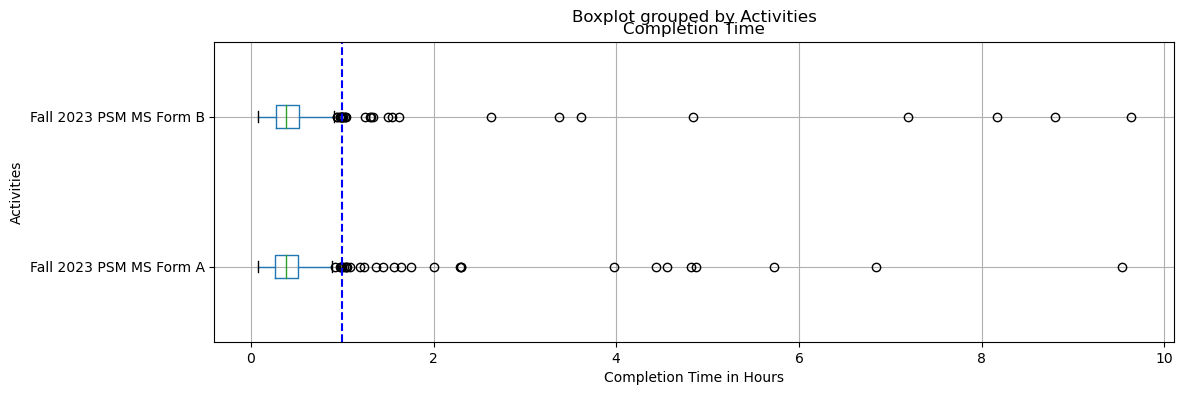

In [29]:
#NO PAUSE Boxplot of Form A & B: Using Melinee's Code to have similar boxplot style
import matplotlib.pyplot as plt

just_pause_and_ct = filtered_pause_time[['Activities','Completion Time']].reset_index()
just_pause_and_ct['Completion Time'] = [td.total_seconds()/3600 for td in just_pause_and_ct['Completion Time']]
just_pause_and_ct.boxplot(column = 'Completion Time', by = 'Activities', figsize=(12,4), vert=False)
#plt.title('Completion Times per Activity')
plt.xlabel('Completion Time in Hours')
plt.axvline(x=1, color='b', linestyle='--', label='1 Hour Mark')
plt.ylabel('Activities')
plt.show()

In [ ]:
#Looking at Completion Times after dropping data with different Begin and End, and no end
result_df['DateTime'] = pd.to_datetime(result_df['Date'] + ' ' + result_df['Time'])

completion_times = []

for assignment, group in result_df.groupby('Assignment'):
    begin_activity = group[group['Action'] == "Begin activity Fall 2023 MS PSM Administration"]['DateTime']
    end_activity = group[group['Action'] == "End activity Fall 2023 MS PSM Administration"]['DateTime']
    activity_name = group['Activities'].iloc[0]
    
    if not begin_activity.empty and not end_activity.empty:
        start_time = begin_activity.iloc[0]
        end_time = end_activity.iloc[0]
        
        completion_time = end_time - start_time
        completion_times.append((assignment, completion_time, activity_name))

completion_times_df = pd.DataFrame(completion_times, columns=['Assignment', 'Completion Time', 'Activities'])
completion_times_df

In [ ]:
#Dataframe of the sorted times between start and end of activity
filtered_times = completion_times_df.sort_values(by="Completion Time", ascending = False)
filtered_comp_time = (filtered_times.reset_index()).drop("index", axis = 1)
filtered_comp_time

In [ ]:
form_b = filtered_comp_time[filtered_comp_time["Activities"] == "Fall 2023 PSM MS Form A"]
form_b

In [ ]:
form_b.describe()

In [ ]:
form_a_median = form_a["Completion Time"].median()
form_a_median

In [ ]:
form_b = filtered_comp_time[filtered_comp_time["Activities"] == "Fall 23 DDM HS Form B"]
form_b

In [ ]:
form_b.describe()

In [ ]:
form_b_median = form_b["Completion Time"].median()
form_b_median

In [ ]:
form_c = filtered_comp_time[filtered_comp_time["Activities"] == "Fall 23 DDM HS Form C"]
form_c

In [ ]:
form_c.describe()

In [ ]:
form_c_median = form_c["Completion Time"].median()
form_c_median

In [ ]:
form_d = filtered_comp_time[filtered_comp_time["Activities"] == "Fall 23 DDM HS Form D"]
form_d

In [ ]:
form_d.describe()

In [ ]:
form_d_median = form_d["Completion Time"].median()
form_d_median

In [ ]:
filtered_comp_time['Activities'] = filtered_comp_time['Activities'].str.extract('(HS Form [ABCD])')
filtered_comp_time

In [ ]:
#Boxplot of Form A, B, C, D: Using Melinee's Code to have similar boxplot style
import matplotlib.pyplot as plt

just_act_and_ct = filtered_comp_time[['Activities','Completion Time']].reset_index()
just_act_and_ct['Completion Time'] = [td.total_seconds()/3600 for td in just_act_and_ct['Completion Time']]
just_act_and_ct.boxplot(column = 'Completion Time', by = 'Activities', figsize=(12,4), vert=False)
plt.title('Completion Times per Activity')
plt.xlabel('Completion Time in Hours')
plt.axvline(x=1, color='b', linestyle='--', label='1 Hour Mark')
plt.ylabel('Activities')
plt.show()